<a href="https://colab.research.google.com/github/JDevine1981/Prediction-of-Product-Sales/blob/main/Project1Part3Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales-predictioncore++-eda.csv'
df = pd.read_csv(fpath)
df.head()

,Unnamed: 0,Item_Identifier,Weight,Fat_Content,Visibility,Type,MRP,Outlet_Identifier,Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,-1.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,-1.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Drop unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [8]:
# Review changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Identifier     8523 non-null   object 
 1   Weight              8523 non-null   float64
 2   Fat_Content         8523 non-null   object 
 3   Visibility          8523 non-null   float64
 4   Type                8523 non-null   object 
 5   MRP                 8523 non-null   float64
 6   Outlet_Identifier   8523 non-null   object 
 7   Establishment_Year  8523 non-null   int64  
 8   Outlet_Size         8523 non-null   object 
 9   Location_Type       8523 non-null   object 
 10  Outlet_Type         8523 non-null   object 
 11  Item_Outlet_Sales   8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### HISTOGRAM OF ITEM OUTLET SALES

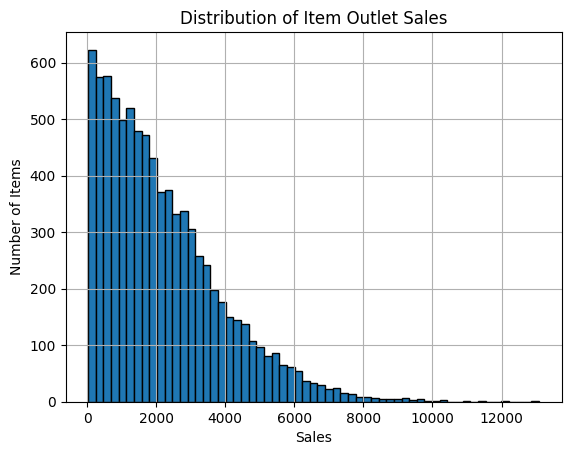

In [16]:
ax = df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor='Black')
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Number of Items');

### GROUPED BOXPLOT FOR ITEM OUTLET SALES AND TYPE

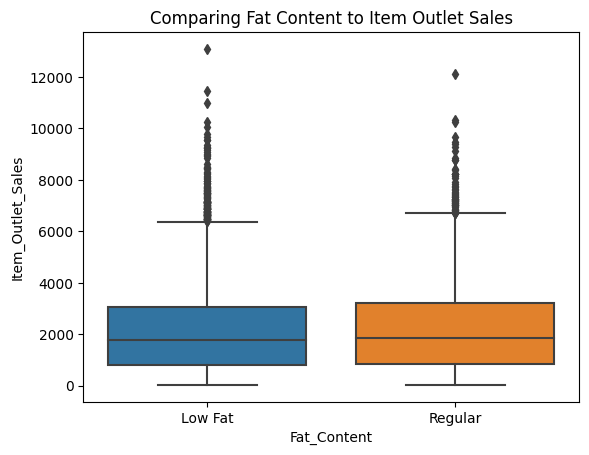

In [85]:
# Boxplot for MRP Dataset
ax = sns.boxplot(data=df, x='Fat_Content', y='Item_Outlet_Sales')
ax.set_title('Comparing Fat Content to Item Outlet Sales');

### Countplot for Product Types

In [58]:
val_counts = df['Type'].value_counts()

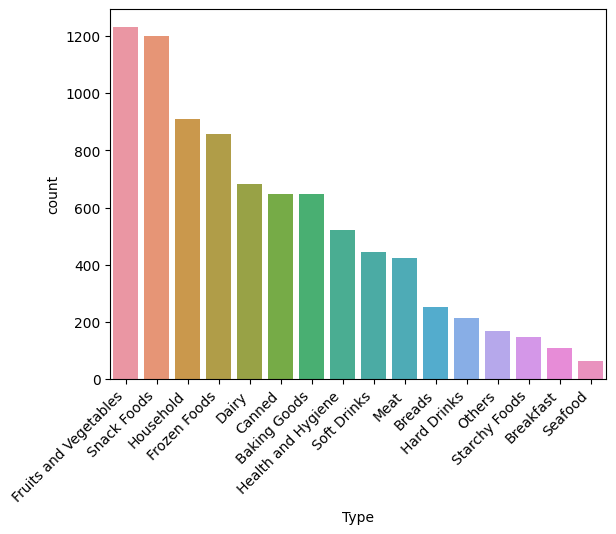

In [59]:
ax = sns.countplot(data=df, x='Type', order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Grouped Bar Chart comparing Product Type with Item Outlet Sales colored by Fat Content

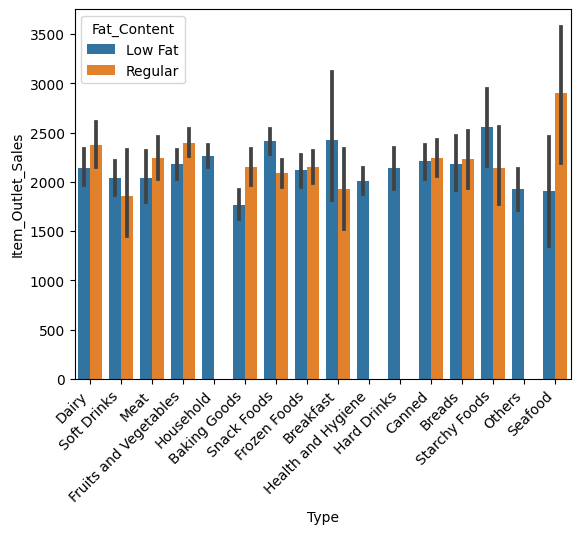

In [83]:
ax = sns.barplot(data=df, x='Type', y='Item_Outlet_Sales', hue='Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### CORRELATIONS

In [65]:
corr = df.corr(numeric_only=True)
corr.round(2)

,Weight,Visibility,MRP,Establishment_Year,Item_Outlet_Sales
Weight,1.00,-0.01,0.02,0.54,-0.06
Visibility,-0.01,1.00,0.01,-0.02,-0.03
MRP,0.02,0.01,1.00,0.01,0.57
Establishment_Year,0.54,-0.02,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.03,0.57,-0.05,1.00


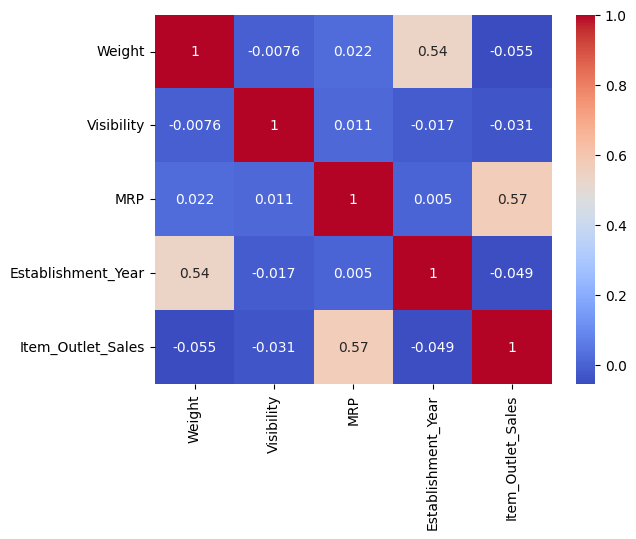

In [67]:
sns.heatmap(corr, cmap='coolwarm', annot=True);

The heatmap shows a moderate positive correlation between MRP and Item Outlet Sales

### Scatterplot with MRP on X-axis and Item Outlet Sales on Y-axis

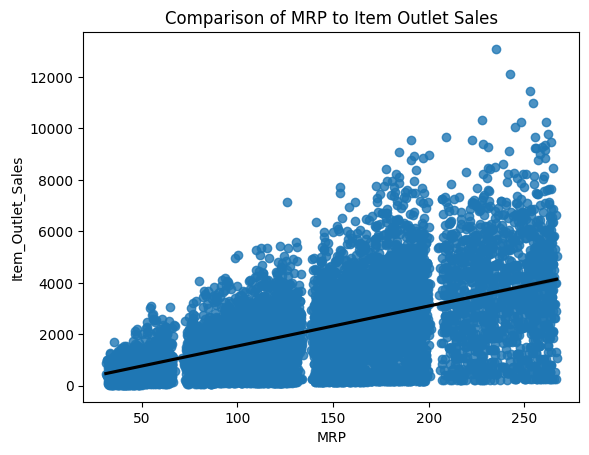

In [74]:
line_kws = dict(color='black')
ax = sns.regplot(data=df, x='MRP', y='Item_Outlet_Sales', line_kws=line_kws)
ax.set_title('Comparison of MRP to Item Outlet Sales');

### Scatterplot colored by Location Type

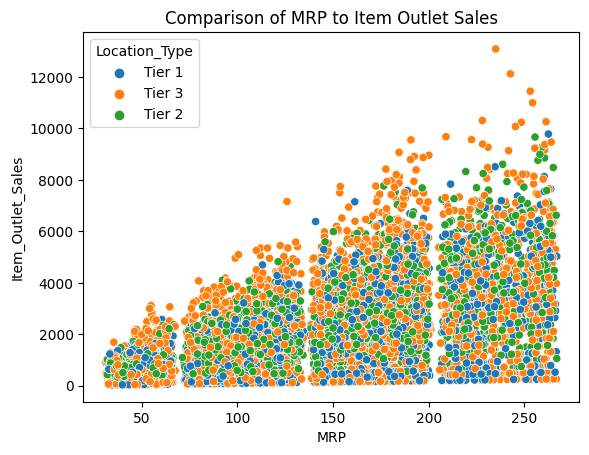

In [76]:
ax=sns.scatterplot(data=df, x='MRP', y='Item_Outlet_Sales', hue='Location_Type')
ax.set_title('Comparison of MRP to Item Outlet Sales');